#Insurance Claims Charges Prediction

Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-12-29 07:22:40--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.007s  

2023-12-29 07:22:40 (7.52 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")



In [ ]:
#Read the Data

df=pd.read_csv("insurance.csv")
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Null check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

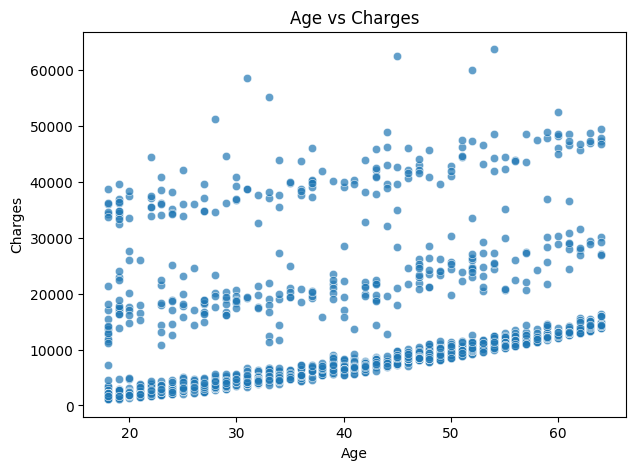

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('insurance.csv')
plt.figure(figsize=(7, 5))
sns.scatterplot(x='age', y='charges', data=df, alpha=0.7)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()



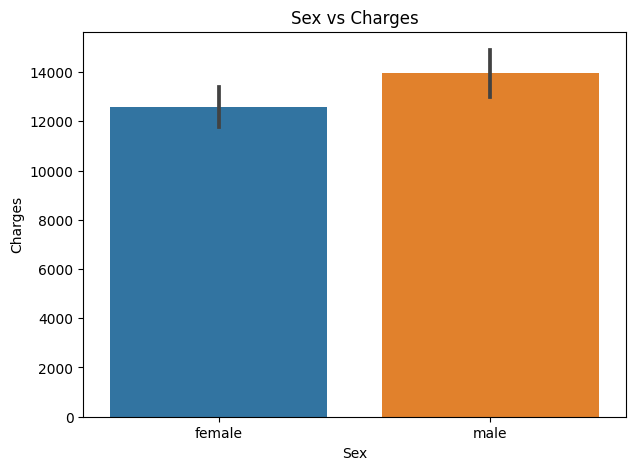

In [ ]:
# sex vs charges
# males insurance charges more than females.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('insurance.csv')
plt.figure(figsize=(7, 5))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()


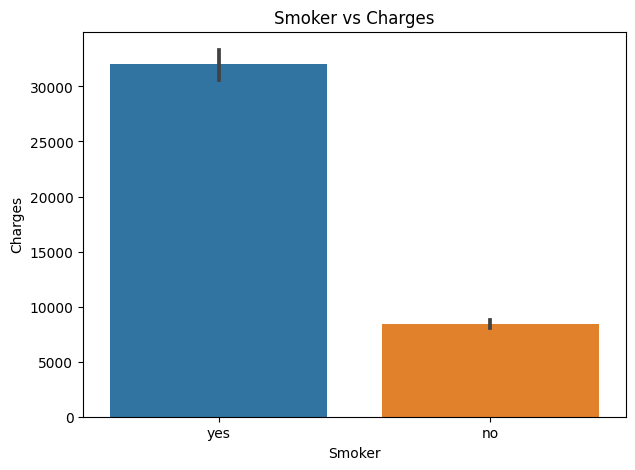

In [ ]:
# smoker vs charges
# smokers have more insurance charges than the non smokers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('insurance.csv')
plt.figure(figsize=(7, 5))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


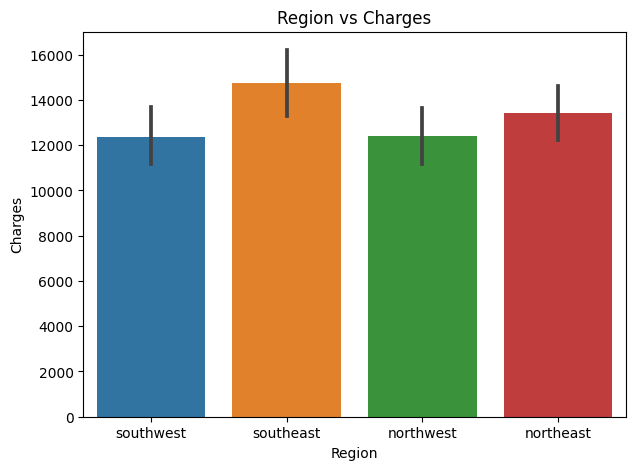

In [ ]:
# region vs charges
# region actually does not play any role in determining the insurance charges

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('insurance.csv')
plt.figure(figsize=(7, 5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


<ipython-input-18-9b0c6d5b691a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


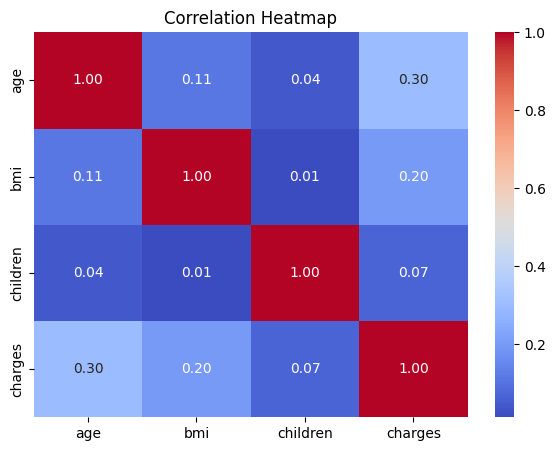

In [ ]:
# plotting the correlation plot for the dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('insurance.csv')
correlation_matrix = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
# Label Encoding for sex and smoker

from sklearn.preprocessing import LabelEncoder
import pandas as pd
df= pd.read_csv('insurance.csv')
print("Unique values in 'sex' column before encoding:", df['sex'].unique())
print("Unique values in 'smoker' column before encoding:", df['smoker'].unique())
label_encoder = LabelEncoder()
df['sex1'] = label_encoder.fit_transform(df['sex'])
df['smoker1'] = label_encoder.fit_transform(df['smoker'])
print("\nUnique values in 'sex_encoded' column after encoding:", df['sex1'].unique())
print("Unique values in 'smoker_encoded' column after encoding:", df['smoker1'].unique())
print("\nUpdated DataFrame:")
print(df.head())




Unique values in 'sex' column before encoding: ['female' 'male']
Unique values in 'smoker' column before encoding: ['yes' 'no']

Unique values in 'sex_encoded' column after encoding: [0 1]
Unique values in 'smoker_encoded' column after encoding: [1 0]

Updated DataFrame:
   age     sex     bmi  children smoker     region      charges  sex1  smoker1
0   19  female  27.900         0    yes  southwest  16884.92400     0        1
1   18    male  33.770         1     no  southeast   1725.55230     1        0
2   28    male  33.000         3     no  southeast   4449.46200     1        0
3   33    male  22.705         0     no  northwest  21984.47061     1        0
4   32    male  28.880         0     no  northwest   3866.85520     1        0


In [ ]:
# removing unnecassary columns from the dataset

r= ['sex', 'smoker', 'region']
df = df.drop(columns=r)
print(df.head())




   age     bmi  children      charges  sex1  smoker1
0   19  27.900         0  16884.92400     0        1
1   18  33.770         1   1725.55230     1        0
2   28  33.000         3   4449.46200     1        0
3   33  22.705         0  21984.47061     1        0
4   32  28.880         0   3866.85520     1        0


In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables

import pandas as pd
df = pd.read_csv('insurance.csv')
print("Columns in the dataset:")
print(df.columns)
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
print("\nSelected features:")
print(features.head())
print("\nSelected target variable:")
print(target.head())


Columns in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Selected features:
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Selected target variable:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df = pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")


Mean Squared Error (MSE): 33596915.85136145
Root Mean Squared Error (RMSE): 5796.284659276273
R-squared score: 0.7835929767120724


##Support Vector Machine

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score


from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")


Mean Squared Error (MSE): 165994564.8489911
Root Mean Squared Error (RMSE): 12883.887800232937
R-squared score: -0.06921688347442001


##Decision Tree

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")


Mean Squared Error (MSE): 42446908.010150984
Root Mean Squared Error (RMSE): 6515.129162967606
R-squared score: 0.7265877305258355


##Random Forest

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")


Mean Squared Error (MSE): 20942520.922619622
Root Mean Squared Error (RMSE): 4576.299916157115
R-squared score: 0.8651034329144947


Compare and evaluate the Model results and find the best model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear'))
]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, rmse, r2])
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)
best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mse, best_rmse, best_r2]].iloc[0]
print("\nBest performing models based on metrics:")
print(best_model)


Model Comparison:
                    Model           MSE          RMSE  R-squared
0       Linear Regression  3.359692e+07   5796.284659   0.783593
1           Decision Tree  4.244691e+07   6515.129163   0.726588
2           Random Forest  2.094252e+07   4576.299916   0.865103
3  Support Vector Machine  1.659946e+08  12883.887800  -0.069217

Best performing models based on metrics:
Model         Random Forest
MSE          20942520.92262
RMSE            4576.299916
R-squared          0.865103
Name: 2, dtype: object
